<H1> Proyecto Estadística Bayesiana
<H3> Los Caballos
<H4> Juan Merchán, Juan Leiva, Juan Reyes

# Librerias

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pymc as pm
import arviz as az

import warnings
warnings.filterwarnings("ignore", message="Glyph .* missing from font")

gold = (1 + np.sqrt(5))/2

pd.options.display.max_columns = None

%matplotlib inline

# Datos

In [133]:
datos = pd.read_csv('Datos_Finales.csv')
datos.head(2)

,ID_Anonimo,Semestre_Ubi,Sexo,Edad,Naturaleza_Colegio,Discapacidad,Servicio_Salud,Tipo_Vivienda,Estrato_Vivienda,Adultos_Responsables,Num_Personas_Hogar,Situacion_Laboral_Madre,Situacion_Laboral_Padre,Educacion_Madre,Educacion_Padre,Libros_Leidos,Mudar_Bogota,Tiempo_Transporte_U,Num_Transportes_U,Pago_Carrera,Inconveniente_Pago,Cantidad_Refuerzo_Areas,Cantidad_Deporte_Interes,Cantidad_Cultura_Interes,Tiempo_Sin_Estudios,Puntaje_ICFES,Promedio
0,366413a452,2,F,20.0,Privado,No,Si,Arrendada,3,Familiar(es),3,Aporta en el hogar,No Aporta en el hogar,Profesional,Profesional,2,SI,30.0,1,Recursos Propios,Muy probable,3,1,1,2.0,300.0,2.781444
1,75972fcf97,3,M,21.0,Privado,No,Si,Propia,3,Familiar(es),4,Aporta en el hogar,Aporta en el hogar,Posgrado,Primaria,2,No,60.0,1,Recursos Propios,Poco probable,3,1,1,0.0,328.0,3.257431


In [134]:
""" Retira faltantes de Promedio """
datos = datos.dropna(subset=['Promedio'], axis=0)

In [277]:
""" Tipo de variables """
datos = datos.rename(columns={'Situacion_Laboral_Madre':'Aporte_Monetario_Madre',
                              'Situacion_Laboral_Padre':'Aporte_Monetario_Padre'})

var_type = {
    'cat': ['Semestre_Ubi', 'Sexo', 'Naturaleza_Colegio', 'Discapacidad', 'Servicio_Salud',
            'Tipo_Vivienda', 'Estrato_Vivienda', 'Adultos_Responsables', 'Aporte_Monetario_Madre', 
            'Aporte_Monetario_Padre', 'Educacion_Madre', 'Educacion_Padre', 'Mudar_Bogota', 
            'Pago_Carrera', 'Inconveniente_Pago'],

    'num_disc': ['Num_Personas_Hogar', 'Num_Transportes_U', 'Cantidad_Refuerzo_Areas', 
                 'Cantidad_Deporte_Interes', 'Cantidad_Cultura_Interes'],

    'num_cont': ['Edad', 'Tiempo_Transporte_U', 'Tiempo_Sin_Estudios', 
                 'Libros_Leidos', 'Puntaje_ICFES', 'Promedio']
}

# Análisis Univariado

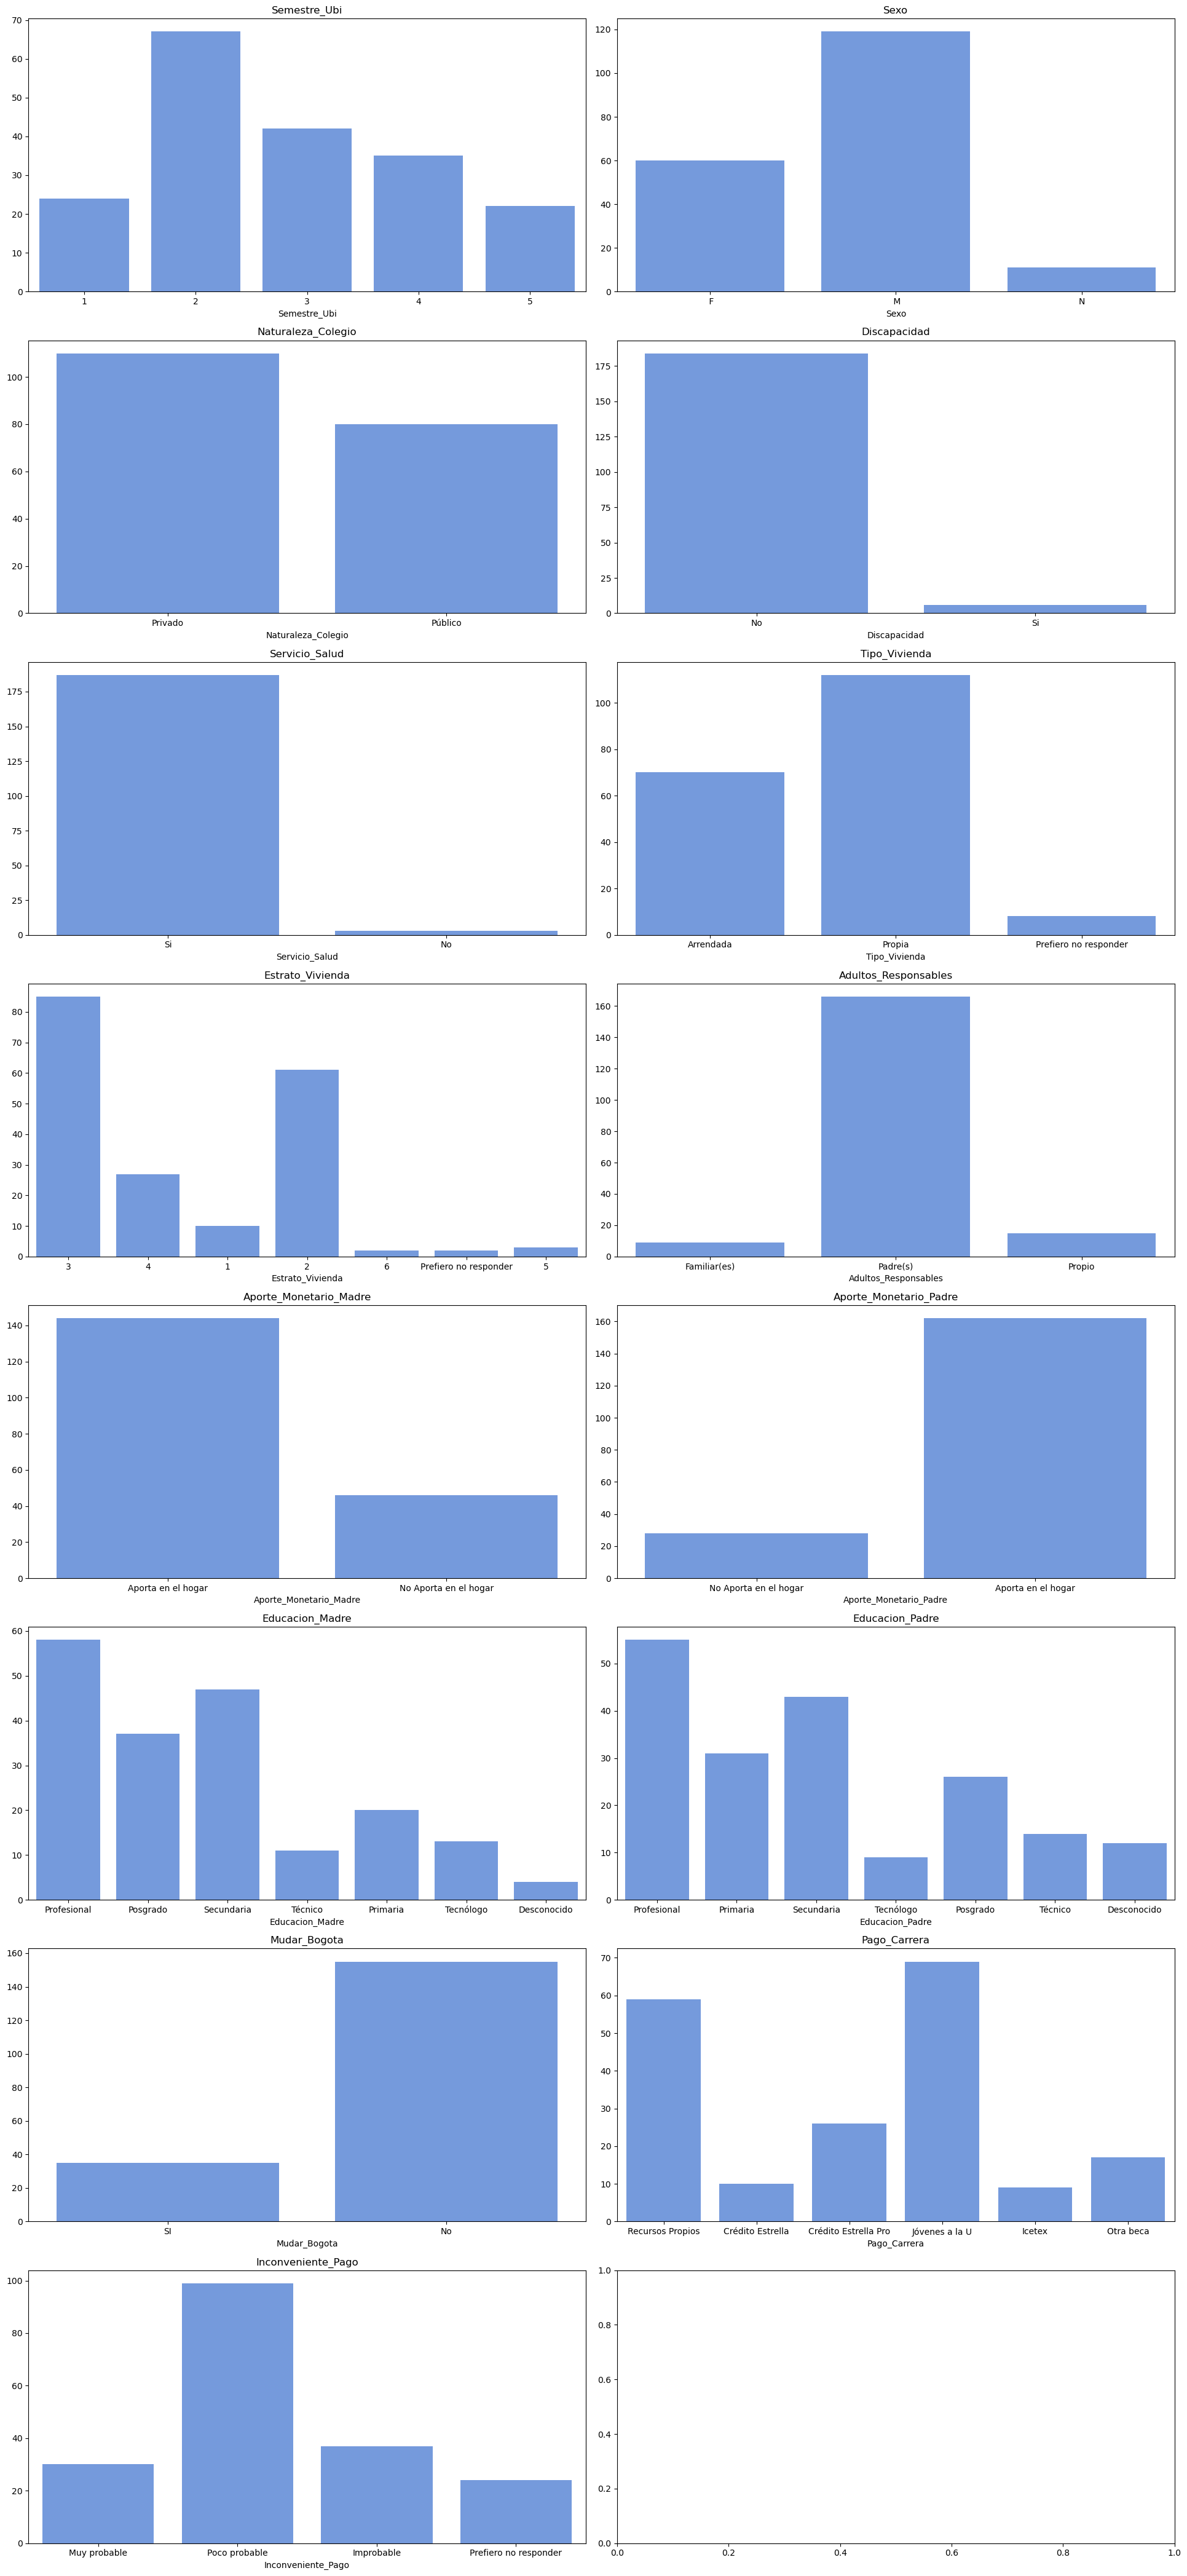

In [286]:
""" Gráficos 1 """
fig, axs = plt.subplots(8,2, figsize=(6*2*gold, 6*7))

j, k = 0, 0

varis = var_type['cat']

for i in range(15):

    var = varis[i]
    sns.countplot(data=datos, x=var, ax=axs[j,k], 
                  color='cornflowerblue')
    
    axs[j,k].set_ylabel('')
    axs[j,k].set_title(var)
    k += 1
    if k == 2:
        k = 0
        j += 1

plt.tight_layout()
plt.show()

In [137]:
datos['Edad'] = datos['Edad'].astype('int')

In [279]:
datos['Tiempo_Sin_Estudios'] = datos['Tiempo_Sin_Estudios'].astype('float32')

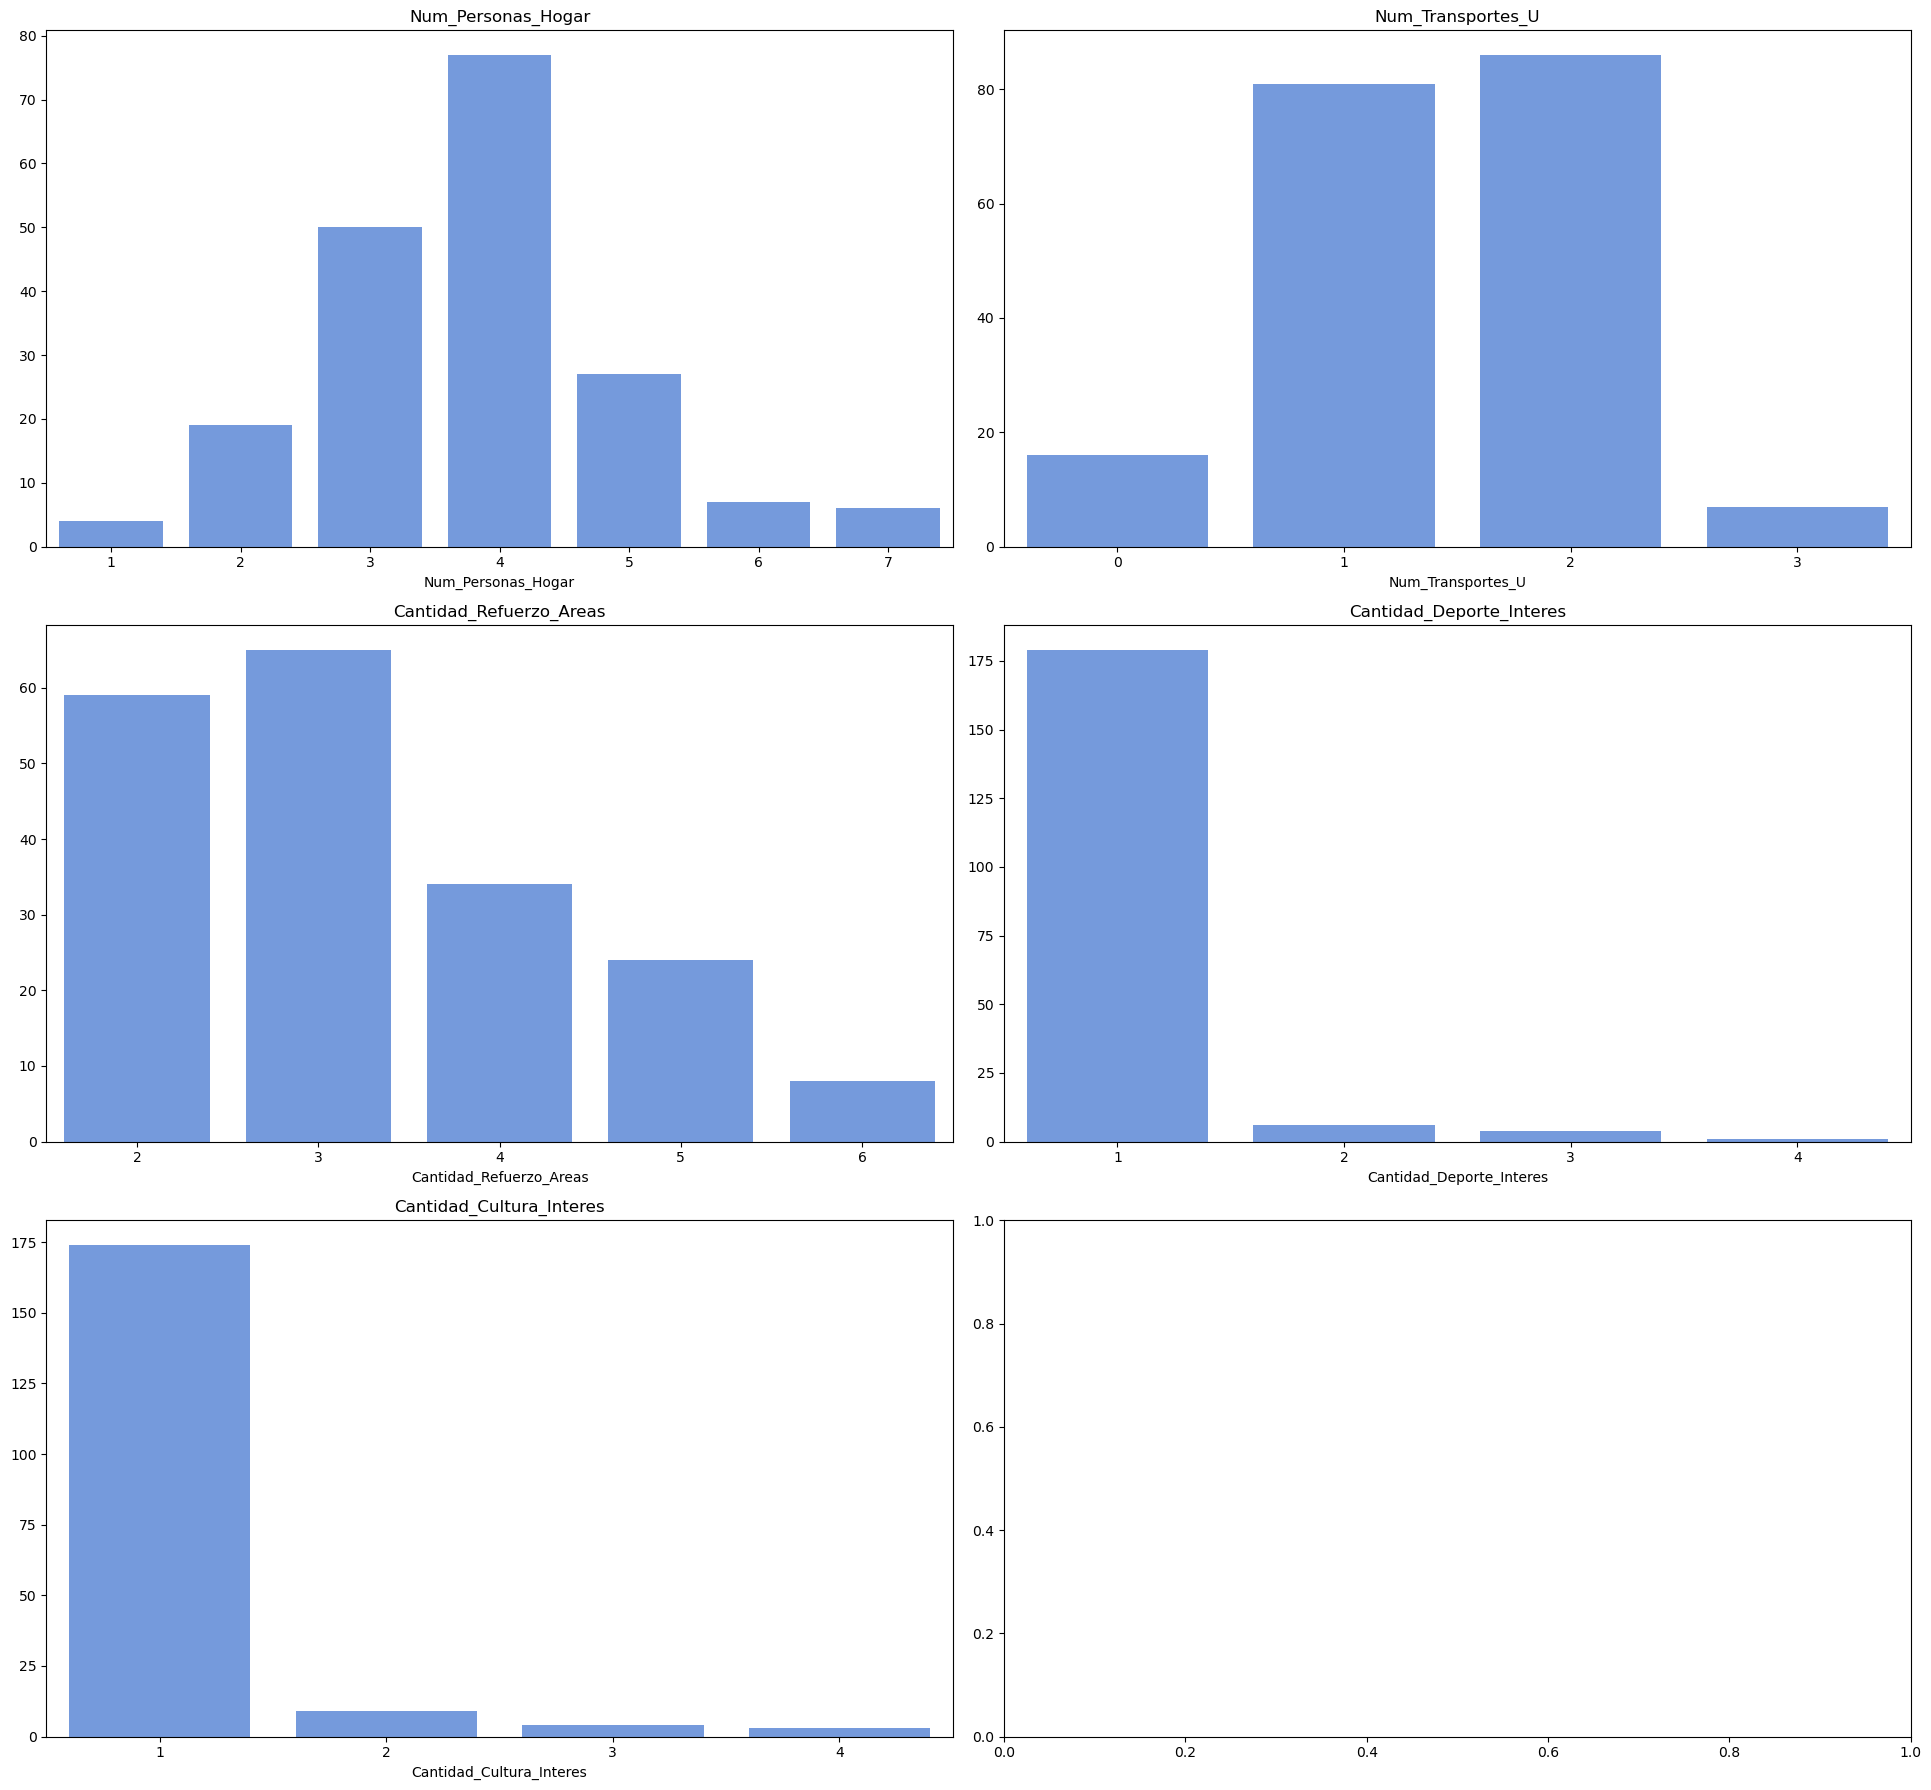

In [280]:
""" Gráficos 2 """
fig, axs = plt.subplots(3,2, figsize=(6*2*gold, 6*3))

j, k = 0, 0

varis = var_type['num_disc']

for i in range(5):

    var = varis[i]
    sns.countplot(data=datos, x=var, ax=axs[j,k], 
                  color='cornflowerblue')
    
    axs[j,k].set_ylabel('')
    axs[j,k].set_title(var)
    k += 1
    if k == 2:
        k = 0
        j += 1

plt.tight_layout()
plt.show()

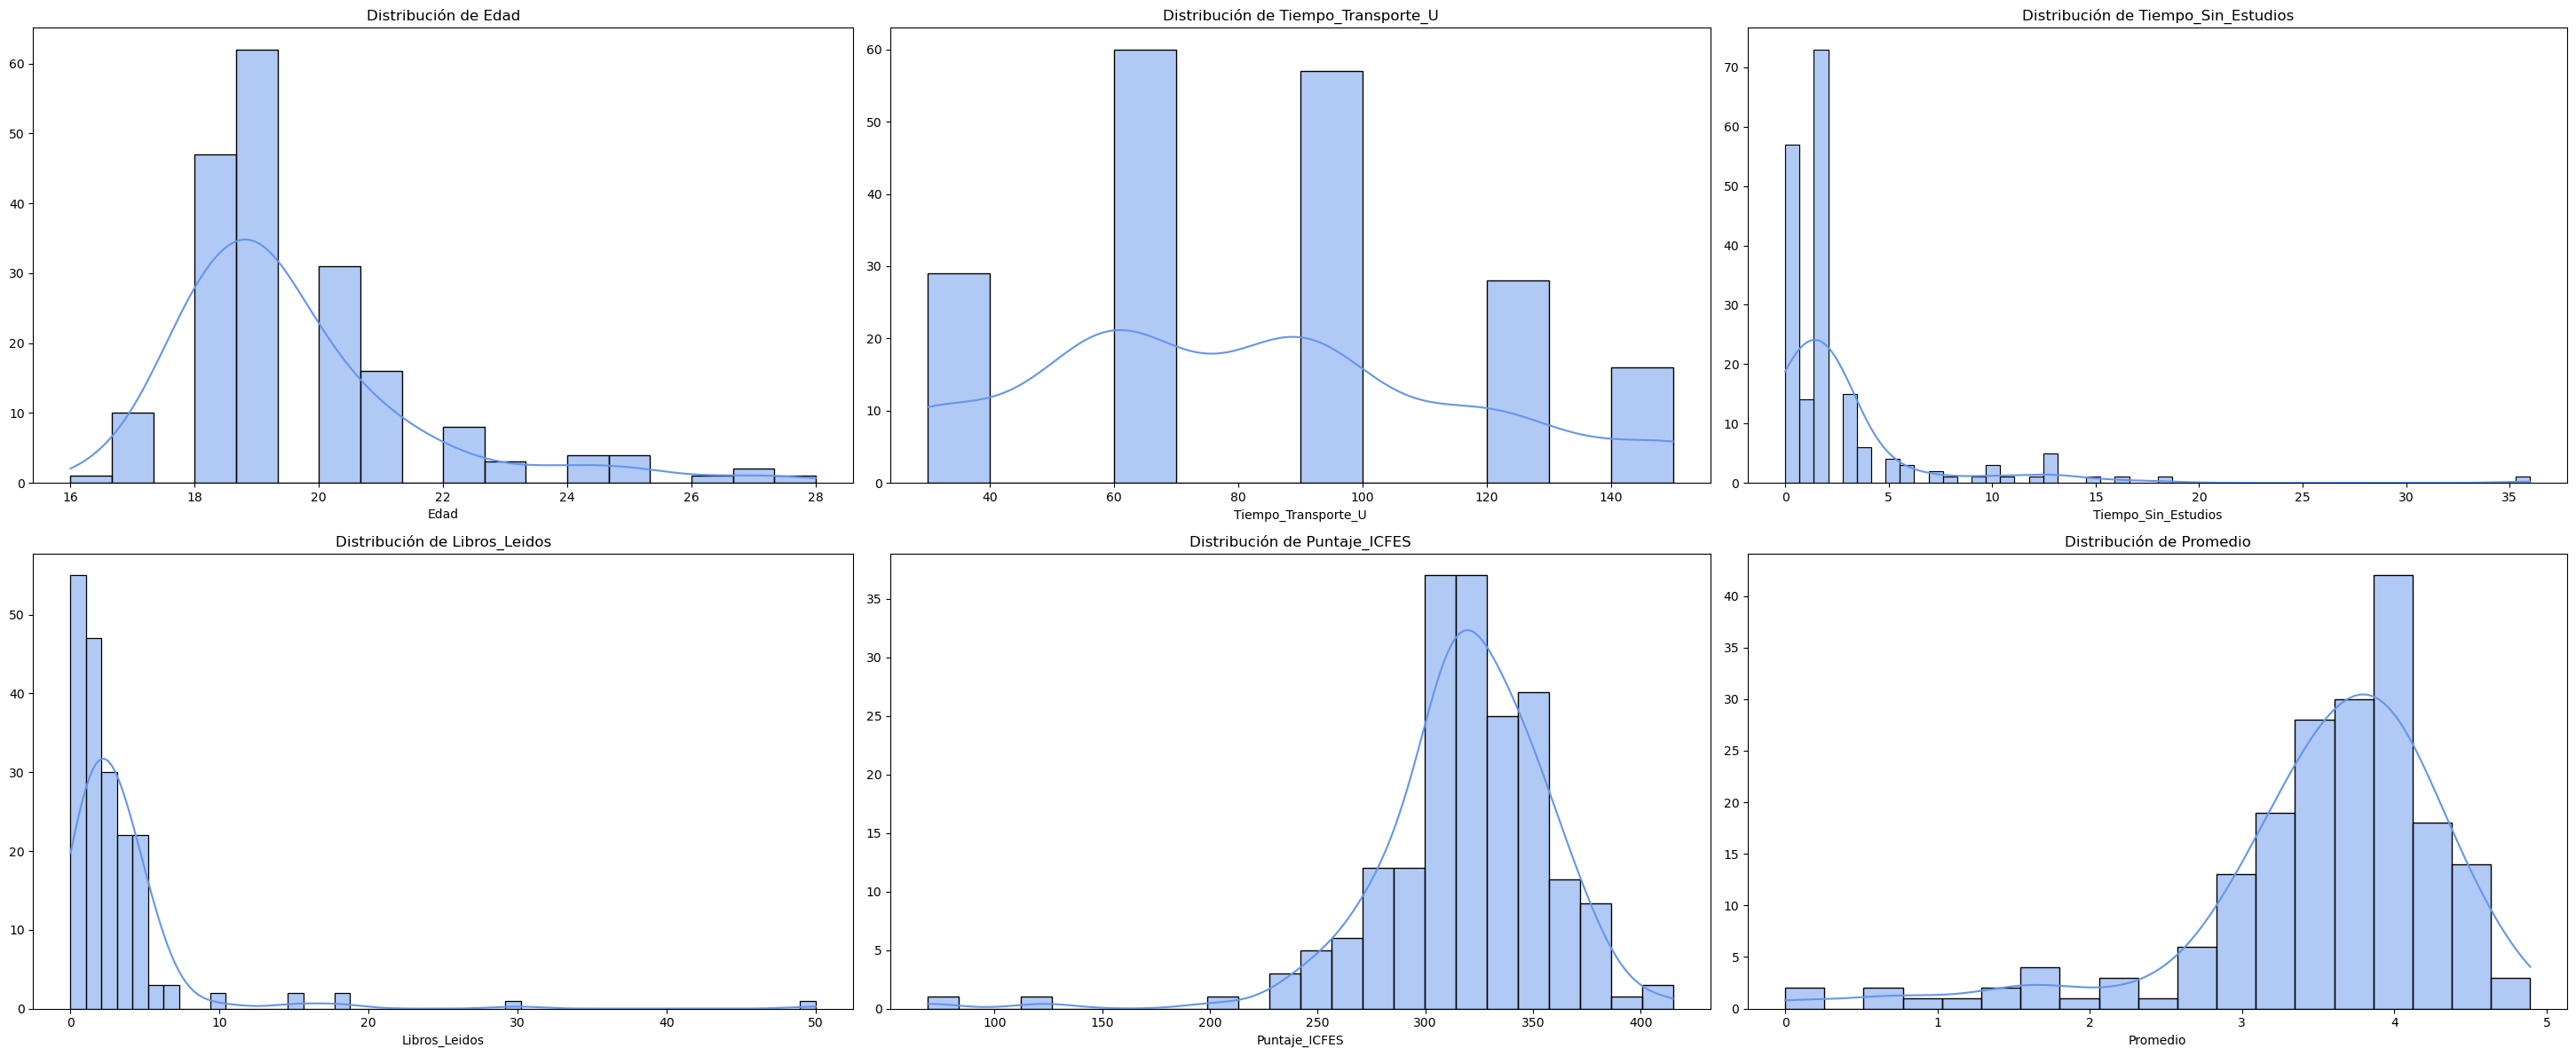

In [285]:
""" Gráficos 3 """
# 32
fig, axs = plt.subplots(2,3, figsize=(6*3*gold, 6*2))

j, k = 0, 0

varis = var_type['num_cont']

for i in range(6):

    var = varis[i]
    sns.histplot(data=datos, x=var, ax=axs[j,k], kde=True,
                 color='cornflowerblue')
    
    axs[j,k].set_ylabel('')
    axs[j,k].set_title(f'Distribución de {var}')
    k += 1
    if k == 3:
        k = 0
        j += 1

plt.tight_layout()
plt.show()

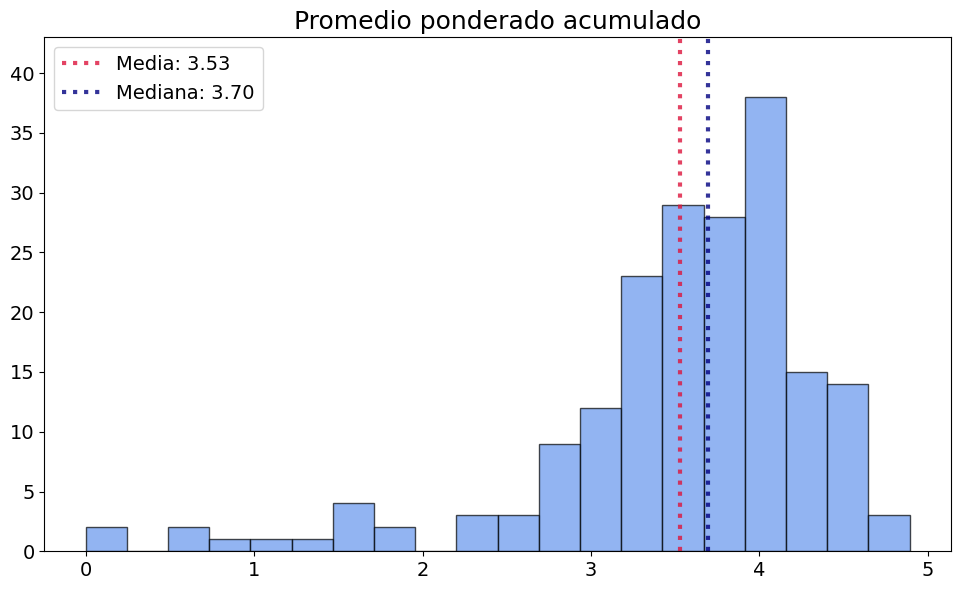

In [293]:
# Supongamos que df es tu DataFrame y contiene la columna "Promedio"
plt.figure(figsize=(6*gold, 6))  # Configura el tamaño de la figura

# Configura el histograma con un gradiente de color
n, bins, patches = plt.hist(datos['Promedio'], bins=20, color='cornflowerblue', edgecolor='black', alpha=0.7)

plt.title('Promedio ponderado acumulado', fontsize=18)  # Título del histograma
#plt.xlabel('Nota promedio', fontsize=12)  # Etiqueta del eje x
plt.ylabel('', fontsize=16)  # Etiqueta del eje y
plt.xticks(fontsize=14)  # Tamaño de fuente para las etiquetas del eje x
plt.yticks(fontsize=14)  # Tamaño de fuente para las etiquetas del eje y

# Establecer límites en el eje y para mejorar la escala
plt.ylim(0, max(n) + 5)  # Ajusta el límite superior un poco más alto que el máximo

# Agregar líneas de referencia en el promedio (opcional)
mean_value = datos['Promedio'].mean()
plt.axvline(mean_value, color='crimson', linestyle=':', linewidth=3, alpha=0.8, label=f'Media: {mean_value:.2f}')
median_value = datos['Promedio'].median()
plt.axvline(median_value, color='navy', linestyle=':', linewidth=3, alpha=0.8, label=f'Mediana: {median_value:.2f}')

plt.legend(loc='upper left', ncols=1, fontsize=14)

# Ajustar el formato de los ticks del eje y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Formato de miles

plt.tight_layout()  # Ajustar el lienzo
plt.show()

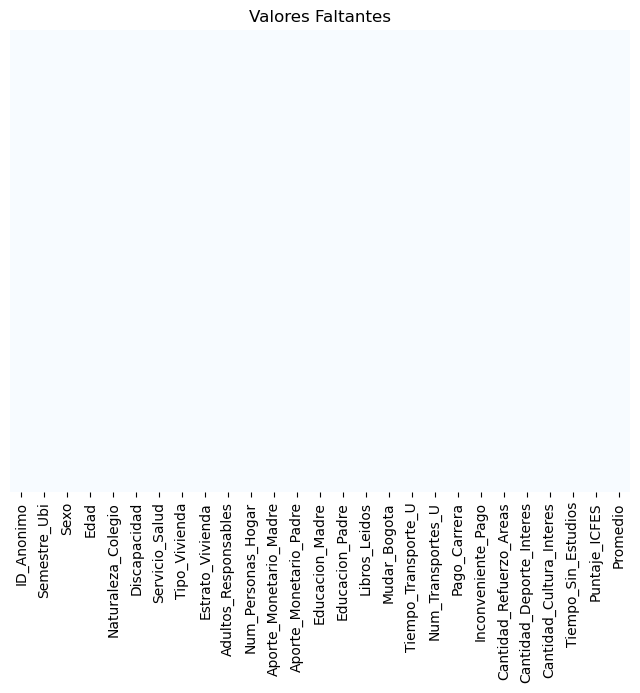

In [260]:
""" Faltantes """
plt.figure(figsize=(8, 6), facecolor='white')  
sns.heatmap(datos.isnull(),cmap='Blues', cbar=False, yticklabels=False)
plt.title('Valores Faltantes')
plt.show()

# Análisis Bivariado

In [246]:
# Función correlaciones

## Librerias

from scipy.stats import spearmanr
from scipy.stats import kendalltau

## Función bonita

def correlaciones(df, var_1, var_2):

    X, Y = pd.DataFrame(df[var_1]) , pd.DataFrame(df[var_2])

    """ Spearman """
    correlation_s, p_value = spearmanr(X,Y)
    # Verificamos correlación monotonica (Crece únicamente en una dirección).

    """ Kendall """
    correlation_k, p_value = kendalltau(X,Y)
    # Verificamos correlación monotonica (Crece únicamente en una dirección).

    #print(f"""
    #    Linealidad: R2 {r2} ;
    #    Spearman: {correlation_s} ;
    #    Kendall: {correlation_k} ;
    #    Distance: {correlation_d}
    #    """)
    
    return correlation_s, correlation_k

In [268]:
# Crear matrices para cada tipo de correlación
var_cont = var_type['num_cont'][:-1] + var_type['num_disc']
spearman_matrix = pd.DataFrame(np.nan, index=var_cont, columns=var_cont)
kendall_matrix = pd.DataFrame(np.nan, index=var_cont, columns=var_cont)

corr = {}

# Calcular correlaciones
for idx_i, i in enumerate(var_cont):
    for idx_j, j in enumerate(var_cont):
        if idx_j > idx_i:
            spearman_corr, kendall_corr = correlaciones(datos, i, j)
            corr[f'{i} ; {j}'] = (spearman_corr, kendall_corr)

            # Asignar valores a las matrices
            spearman_matrix.loc[i, j] = spearman_corr
            kendall_matrix.loc[i, j] = kendall_corr

spearman_matrix = spearman_matrix.T
kendall_matrix = kendall_matrix.T

In [269]:
datos['Tiempo_Sin_Estudios'] = datos['Tiempo_Sin_Estudios'].fillna(3).astype('int')

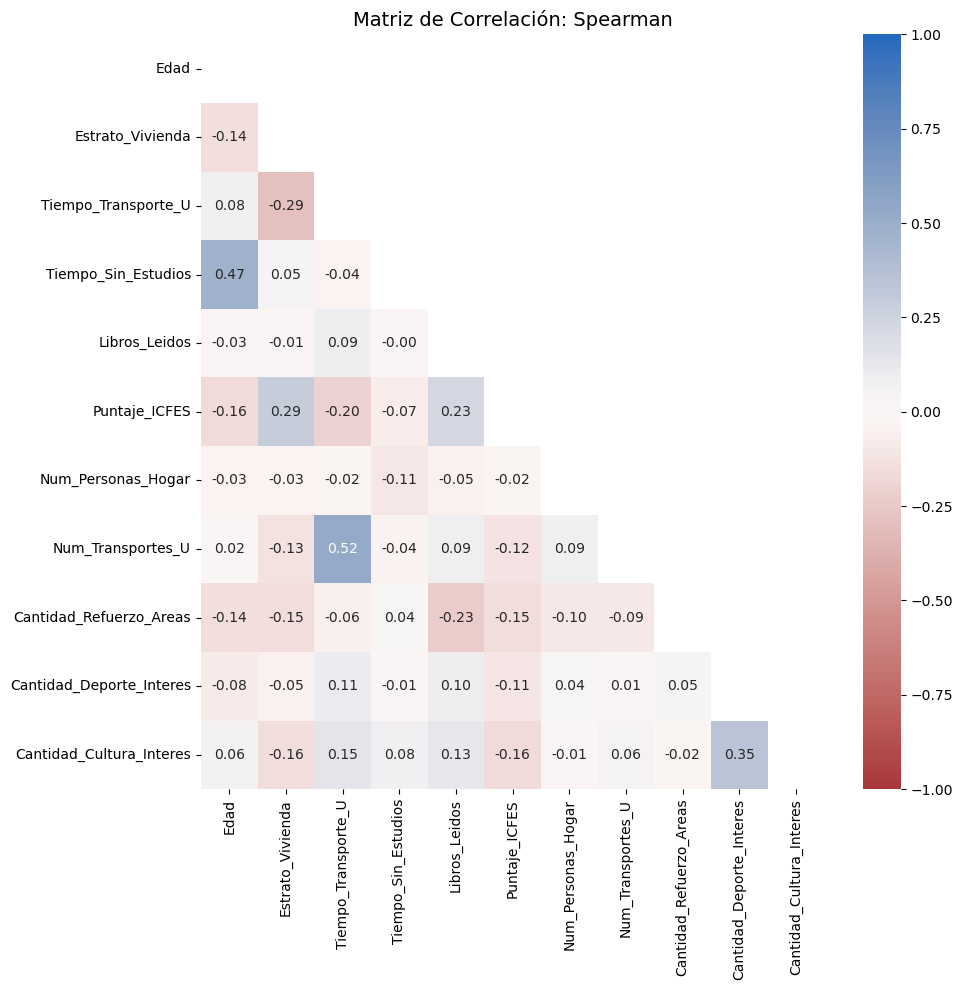

In [359]:
# R2 Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(spearman_matrix, annot=True, fmt=".2f", cmap="vlag_r", vmin=-1, vmax=1)
plt.title("Matriz de Correlación: Spearman", fontdict={'fontsize':14})
plt.tight_layout()
plt.show()

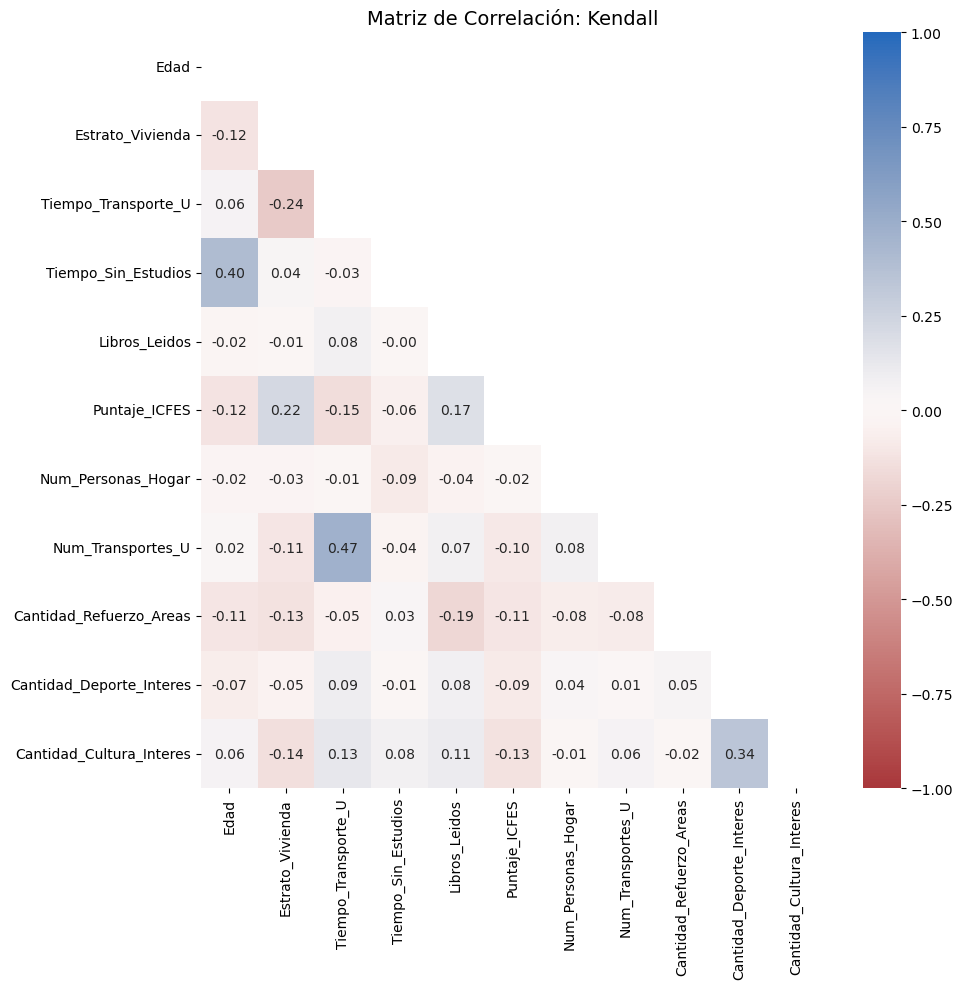

In [360]:
# Kendall Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(kendall_matrix, annot=True, fmt=".2f", cmap="vlag_r", vmin=-1, vmax=1)
plt.title("Matriz de Correlación: Kendall", fontdict={'fontsize':14})
plt.tight_layout()
plt.show()

In [307]:
# Crear matrices para cada tipo de correlación
var_cont = var_type['num_cont'][:-1] + var_type['num_disc']
spearman_vector = []
kendall_vector = []


# Calcular correlaciones
j = 'Promedio'
for i in var_cont:
    spearman_corr, kendall_corr = correlaciones(datos, i, j)
    spearman_vector.append(spearman_corr)
    kendall_vector.append(kendall_corr)

corr = pd.DataFrame({
    'Spearman': spearman_vector,
    '': [np.nan for _ in range(len(spearman_vector))],
    'Kendall': kendall_vector
}, index=var_cont).T
corr

,Edad,Tiempo_Transporte_U,Tiempo_Sin_Estudios,Libros_Leidos,Puntaje_ICFES,Num_Personas_Hogar,Num_Transportes_U,Cantidad_Refuerzo_Areas,Cantidad_Deporte_Interes,Cantidad_Cultura_Interes
Spearman,-0.020958,-0.073827,0.042129,0.156967,0.514148,-0.016221,-0.090161,-0.124232,0.012883,-0.069371
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kendall,-0.017095,-0.056205,0.033854,0.113207,0.368084,-0.012258,-0.072564,-0.094356,0.010172,-0.055970


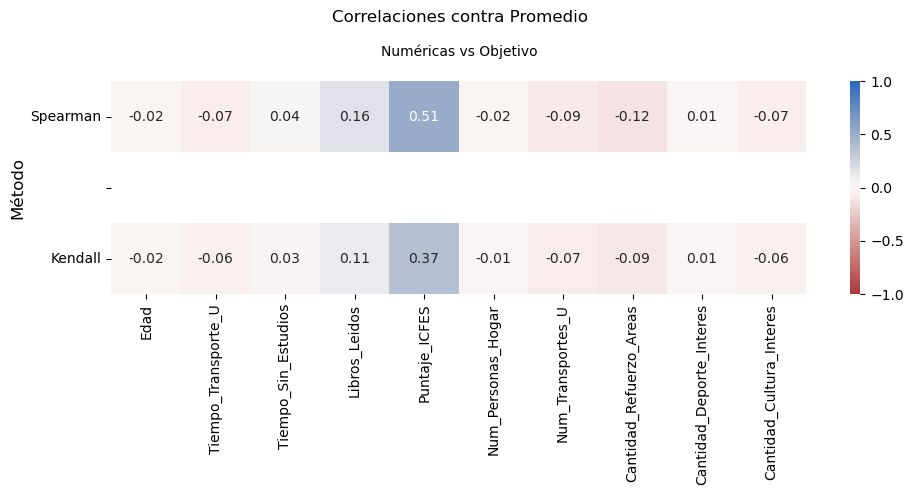

In [363]:
# Kendall Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag_r", vmin=-1, vmax=1)
plt.suptitle('Correlaciones contra Promedio', fontdict={'fontsize':16}, x=0.465)
plt.title('Numéricas vs Objetivo\n', fontdict={'fontsize':10}, x=0.5)

plt.ylabel('Método', rotation=90, fontdict={'fontsize':12})
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Modelo

## Priors

In [142]:
import numpy as np
from scipy.stats import uniform

def flat_prior(param_range):
    """
    Crea una distribución a priori plana (uniforme) para un parámetro.

    :param param_range: Tupla que representa el rango (mínimo, máximo) del parámetro.
    :return: Un array de valores y sus respectivas probabilidades a priori.
    """
    low, high = param_range
    distribution = uniform(loc=low, scale=high - low)

    num_points = 1000
    param_values = np.linspace(low, high, num_points)
    
    prior_probabilities = distribution.pdf(param_values)
    
    return prior_probabilities

# param_range = (0, 10) 
# prior_probabilities = flat_prior(param_range)

## Likelihood

In [143]:
from sklearn.model_selection import train_test_split

""" Separa para facilitar el trabajo """
X = datos.drop(columns=['Promedio', 'ID_Anonimo'])
y = datos['Promedio']

In [144]:
def inconv(x):
    if x == 'Muy probable': return 1
    elif x == 'Improbable': return 3
    else: return 2

X['Inconveniente_Pago'] = X['Inconveniente_Pago'].apply(inconv)

In [145]:
from sklearn.preprocessing import StandardScaler

def to_binary(val, num_bits):
    return format(val, f'0{num_bits}b')

# Función para codificación binaria de una columna categórica
def binary_encoding(df, column):
    # Asignar un índice numérico a cada categoría, manejando valores faltantes o no válidos
    df[column] = df[column].astype('category')  # Convertir a tipo categoría
    unique_values = df[column].cat.codes  # Asignar un código numérico a cada categoría
    num_bits = len(format(unique_values.max(), 'b'))  # Calcular el número de bits necesarios

    # Convertir las categorías a su representación binaria
    binary_columns = unique_values.apply(lambda x: pd.Series(list(to_binary(x, num_bits)), dtype=int))

    # Renombrar las columnas binarias
    binary_columns.columns = [f'{column}_bin_{i}' for i in range(num_bits)]

    # Retornar las columnas binarias para agregarlas al dataframe original
    return binary_columns

In [146]:
X_enc = X.copy()

for i in var_type['cat']:
    X_enc[i] = X_enc[i].fillna('Desconocido')  # Reemplazar NaN con Desconocido
    bin_cols = binary_encoding(X_enc, i)
    X_enc = pd.concat([X_enc, bin_cols], axis=1)
    X_enc = X_enc.drop(columns=[i])

In [147]:
# Paso 1: Estandarizar las variables numéricas (excepto la columna objetivo "Promedio")
# scaler = StandardScaler()
# # Excluir la columna 'Promedio' de las variables numéricas
# num_cols = [col for col in var_type['num'] if col != "Promedio"]
# datos[num_cols] = scaler.fit_transform(datos[num_cols])

# # Paso 2: Aplicar la codificación binaria personalizada a las variables categóricas
# for col in var_type['cat']:
#     if col in datitos.columns:
#         datitos[col] = datitos[col].replace('-', pd.NA)  # Reemplazar valores no válidos con NaN
#         datitos[col] = datitos[col].fillna('Unknown')  # Reemplazar NaN con 'Unknown'
#         binary_cols = binary_encoding(datitos, col)
#         datitos = pd.concat([datitos, binary_cols], axis=1)
#         datitos = datitos.drop(columns=[col])  # Eliminamos la columna categórica original
#     else:
#         print(f"La columna '{col}' no existe en el DataFrame.")

# Ahora datitos tiene variables numéricas estandarizadas y categóricas codificadas en binario

#### Faltantes

In [148]:
X_enc['Estrato_Vivienda'] = X_enc['Estrato_Vivienda'].apply(lambda x: np.nan if x == 'Prefiero no responder' else x).astype('float16') 

In [149]:
from sklearn.impute import KNNImputer

# Inicializa el imputador con KNN y especifica el número de vecinos
imputer = KNNImputer(n_neighbors=3)

# Aplica la imputación
X_enc = pd.DataFrame(imputer.fit_transform(X_enc), columns=X_enc.columns)

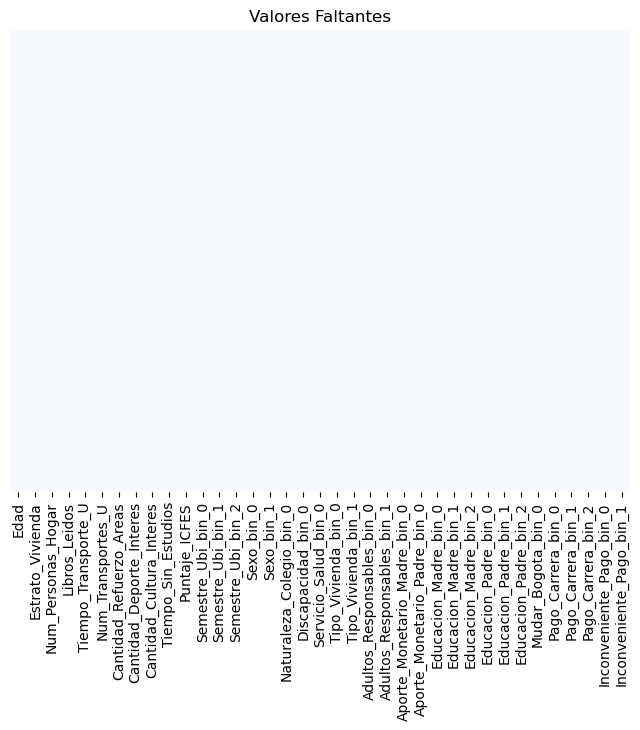

In [150]:
""" Faltantes """
plt.figure(figsize=(8, 6), facecolor='white')  
sns.heatmap(X_enc.isnull(),cmap='Blues', cbar=False, yticklabels=False)
plt.title('Valores Faltantes')
plt.show()

In [153]:
""" Separa en Train y Test """
X_train, X_test, y_train, y_test = train_test_split(X_enc,y,test_size=0.25,random_state=8)

## Entrena el Modelo

In [154]:
quantile = 0.50

with pm.Model() as quantile_model:
    beta_0 = pm.Normal('beta_0', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X_train.shape[1])
    sigma = pm.HalfNormal('sigma', sigma=1)

    y_hat = beta_0 + pm.math.dot(X_train, beta)

    likelihood = pm.AsymmetricLaplace('likelihood', b=sigma, kappa=quantile, mu=y_hat, observed=y_train)
    step = pm.NUTS(target_accept=0.95, max_treedepth=15)

    # Paso 2: Ajustar el modelo usando el paso NUTS
    trace = pm.sample(2000, tune=1000, step=step, return_inferencedata=True)

/opt/miniconda3/envs/quesobayesiano312/lib/python3.12/site-packages/pytensor/tensor/math.py:1115: FutureWarning: sgn is deprecated and will stop working in the future, use sign instead.
  warnings.warn(
/opt/miniconda3/envs/quesobayesiano312/lib/python3.12/site-packages/pytensor/tensor/math.py:1115: FutureWarning: sgn is deprecated and will stop working in the future, use sign instead.
  warnings.warn(
/opt/miniconda3/envs/quesobayesiano312/lib/python3.12/site-packages/pytensor/tensor/math.py:1115: FutureWarning: sgn is deprecated and will stop working in the future, use sign instead.
  warnings.warn(
/opt/miniconda3/envs/quesobayesiano312/lib/python3.12/site-packages/pytensor/tensor/math.py:1115: FutureWarning: sgn is deprecated and will stop working in the future, use sign instead.
  warnings.warn(
/opt/miniconda3/envs/quesobayesiano312/lib/python3.12/site-packages/pytensor/tensor/math.py:1115: FutureWarning: sgn is deprecated and will stop working in the future, use sign instead.
  

Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 790 seconds.


In [158]:
# Paso 3: Convertir el trace en un formato compatible con ArviZ y obtener el resumen
az_summary = az.summary(trace)

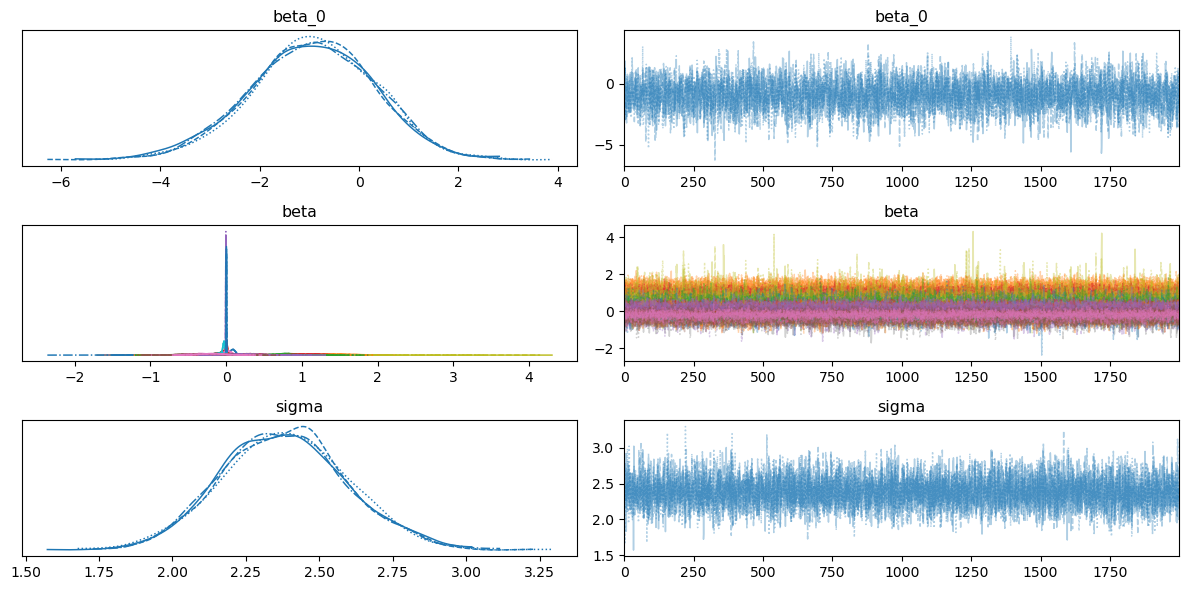

In [159]:
az.plot_trace(trace)
plt.tight_layout()
plt.show()